In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from tqdm import tqdm
import swordfish as sf
from WIMpy import DMUtils as DMU

%matplotlib inline

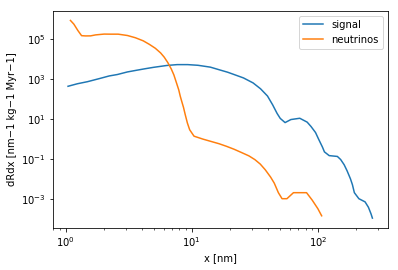

In [2]:
x, dRdx = np.loadtxt("../Data/Sylvanite_500GeV.txt", unpack=True)
xbkg, dRdxbkg = np.loadtxt("../Data/Sylvanite_neutrinoBKG.txt", unpack=True)
plt.loglog(x,dRdx, label="signal")
plt.loglog(xbkg, dRdxbkg, label="neutrinos")
plt.legend()
plt.ylabel(r"dRdx [nm−1 kg−1 Myr−1]")
plt.xlabel(r"x [nm]")
plt.show()

In [3]:
ref_sig = 1e-45
Nevents_w = np.trapz(dRdx[x>10]*1e-1,x=x[x>10])
print("Number of events at current limit with cuts", Nevents_w)
Nevents_wo = np.trapz(dRdx*1e-1,x=x)
print("Number of events at current limit without cuts", Nevents_wo)

Number of events at current limit with cuts 4553.000127652895
Number of events at current limit without cuts 8357.997086152893


In [4]:
# For a 1kg Myr exposure they place their limit at roughly 1e-48 for a 500 GeV particle
# Lets therefore scale our rate down by a factor of 10^3 
# They also use a rough cut off at 10nm so we will only consider events longer than this

In [5]:
dRdx_lim = dRdx*1e-3
Nevents_lim = np.trapz(dRdx_lim[x>10],x=x[x>10])
print("Number of events needed for a discovery =", Nevents_lim)
print("According to Baum cut and count...")

Number of events needed for a discovery = 45.53000127652895
According to Baum cut and count...


In [6]:
# Lets assess whether we then get roughly the correct signal to noise of 3.
err = 1.
Nevents_bkg = np.trapz(dRdxbkg[xbkg>10], x=xbkg[xbkg>10])
SNR = Nevents_lim/np.sqrt(Nevents_bkg + err**2.*Nevents_bkg**2.)
print("Signal to noise roughly at the limit for a 10nm lower cutoff =", SNR)
print("Roughly equal to the 3 they quote")

Signal to noise roughly at the limit for a 10nm lower cutoff = 4.445176667072972
Roughly equal to the 3 they quote


In [7]:
# Lets load some backgrounds and do a simple spectral analysis on the shapes
x_bins = np.linspace(0.1,100.,20)
x_binw = np.diff(x_bins)
x_c = x_bins[:-1] + x_binw/2.
from scipy.interpolate import interp1d
sig_interp = interp1d(x, dRdx, bounds_error=False, fill_value=0.0)
bkg_interp = interp1d(xbkg, dRdxbkg, bounds_error=False, fill_value=0.0)

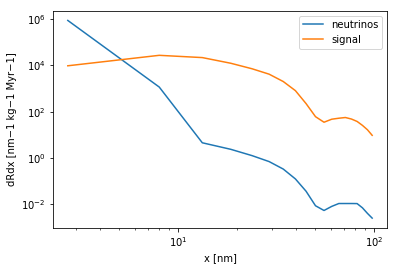

[9.47475792e+03 2.68448704e+04 2.14274070e+04 1.21917526e+04
 7.03663548e+03 4.11517894e+03 1.97478969e+03 7.96387375e+02
 2.20056881e+02 5.97934406e+01 3.43787205e+01 4.64514238e+01
 5.12130616e+01 5.49700741e+01 4.72246200e+01 3.71055001e+01
 2.51234831e+01 1.62458500e+01 9.33389702e+00] [8.64752985e+05 1.14046758e+03 4.44309696e+00 2.31786888e+00
 1.23599495e+00 6.84404014e-01 3.24402108e-01 1.21437986e-01
 3.57597810e-02 8.41356393e-03 5.25789484e-03 7.90419550e-03
 1.05157896e-02 1.05157896e-02 1.05157896e-02 1.04364695e-02
 6.85253603e-03 3.94043347e-03 2.45768051e-03]


In [8]:
sig = sig_interp(x_c)*x_binw + 1e-10
bkg = bkg_interp(x_c)*x_binw + 1e-10
plt.loglog(x_c,bkg, label="neutrinos")
plt.loglog(x_c,sig, label="signal")
plt.legend()
plt.ylabel(r"dRdx [nm−1 kg−1 Myr−1]")
plt.xlabel(r"x [nm]")
plt.show()
print(sig,bkg)

In [9]:
# Setting a limit at 3 events roughly corresponds to a 95% CL limit for zero bkg one bin experiment
SF = sf.Swordfish([bkg], T=[1.0], E=np.ones_like(sig))
temp = SF.upperlimit(sig, 0.05)
lim = ref_sig * temp
sig_lim = sig * temp
print("Limit from spectral analysis =", lim)
Nevents_lim = np.sum(sig_lim)
print("This corresponds to roughly", Nevents_lim)

Limit from spectral analysis = 1.6064452238919038e-49
This corresponds to roughly 13.56862693796312


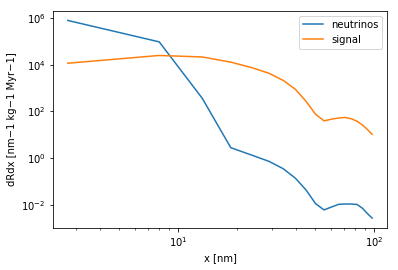

In [10]:
from scipy.ndimage.filters import gaussian_filter1d
bkgGauss = gaussian_filter1d(bkg, 0.5)
sigGauss = gaussian_filter1d(sig, 0.5)
plt.loglog(x_c,bkgGauss, label="neutrinos")
plt.loglog(x_c,sigGauss, label="signal")
plt.legend()
plt.ylabel(r"dRdx [nm−1 kg−1 Myr−1]")
plt.xlabel(r"x [nm]")
plt.show()

In [11]:
# Setting a limit at 3 events roughly corresponds to a 95% CL limit for zero bkg one bin experiment
SFGauss = sf.Swordfish([bkgGauss], T=[1.0], E=np.ones_like(sigGauss))
tempGauss = SFGauss.upperlimit(sigGauss, 0.05)
limGauss = ref_sig * tempGauss
sig_limGauss = sigGauss * tempGauss
print("Limit from spectral analysis =", limGauss)
Nevents_limGauss = np.sum(sig_limGauss)
print("This corresponds to roughly", Nevents_limGauss)

Limit from spectral analysis = 1.867454467057538e-49
This corresponds to roughly 15.773206960489242
